In [2]:
import pandas as pd

In [3]:
# 1. 파일에서 데이터 읽어 오기
# CCTV 파일 읽어 오기
CCTV_seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8')
type(CCTV_seoul)

pandas.core.frame.DataFrame

In [4]:
CCTV_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [5]:
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
CCTV_seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [7]:
CCTV_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [9]:
#CCTV_seoul.columns[0]='구별' 오류발생

# 열이름 '기관명'을 '구별'로 변경 : rename() 사용
CCTV_seoul.rename(columns={CCTV_seoul.columns[0] : '구별'}, inplace=True)
CCTV_seoul.head()

# inplace=True : 변수의 내용 갱신 (작업 완료) : 없으면 변경되지 않음 (commit)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [15]:
CCTV_sorted = CCTV_seoul.sort_values(by='소계', ascending=False )
CCTV_sorted.head(1)
CCTV_sorted.tail(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932


In [20]:
CCTV_seoul['증가율'] = (CCTV_seoul['2014년'] + CCTV_seoul['2015년'] + CCTV_seoul['2016년']) / CCTV_seoul['2013년도 이전'] * 100;
CCTV_seoul.sort_values(by='증가율').head()
#CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,증가율
18,양천구,2482,1843,142,30,467,34.671731
13,서대문구,1254,844,50,68,292,48.578199
20,용산구,2096,1368,218,112,398,53.216374
5,광진구,878,573,78,53,174,53.228621
14,서초구,2297,1406,157,336,398,63.371266


In [31]:
pop_seoul = pd.read_excel('population_in_Seoul.xls' , header=2 , usecols='B, D, G, J, N')#엑셀의B,D,..열을 읽어라
pop_seoul.head()
pop_seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [32]:
# rename 메소드 이용
pop_seoul.rename (columns= { pop_seoul.columns[0] : '구별', 
                             pop_seoul.columns[1] : '인구수',
                            pop_seoul.columns[2] :'한국인',
                            pop_seoul.columns[3]:'외국인',
                            pop_seoul.columns[4] : '고령자'
                           } ,  inplace = True )
#0번 컬럼-구별 
#1번 컬럼-인구수
#2  - 한국인
#3 - 외국인
#4 - 고령자.

# head 확인
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


#의 데이터는 총합계이므로 필요없다. 삭제
#

In [33]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [36]:
pop_seoul['구별'].values
pop_seoul.tail()
pop_seoul.drop([26], inplace=True)
pop_seoul.tail()


,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


#외국인비율 열을 추가한다 ; 인구수 대비 외국인 비율을 계산한다
#고령자비율 열을 추가한다 ; 인구수 대비 고령자 비율을 계산한다
인구수 가장 많은 상위구 5개 조회한다
외국인 가장 많은 상위구 5개 조회한다
고령자 가장 많은 상위구 5개 조회한다.


In [38]:
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수'] *100
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수'] *100
pop_seoul.sort_values(by='외국인비율').tail()



,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [39]:
pop_seoul.sort_values(by='외국인').tail()


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [40]:
pop_seoul.sort_values(by='고령자').tail()


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [41]:
pop_seoul.sort_values(by='고령자비율').tail()


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


In [43]:
pop_seoul.sort_values(by='인구수').tail()


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599


In [58]:
#합침
data_result = pd.merge(CCTV_seoul , pop_seoul)
data_result.head()

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

#구별 행인덱스
data_result.set_index('구별', inplace=True)

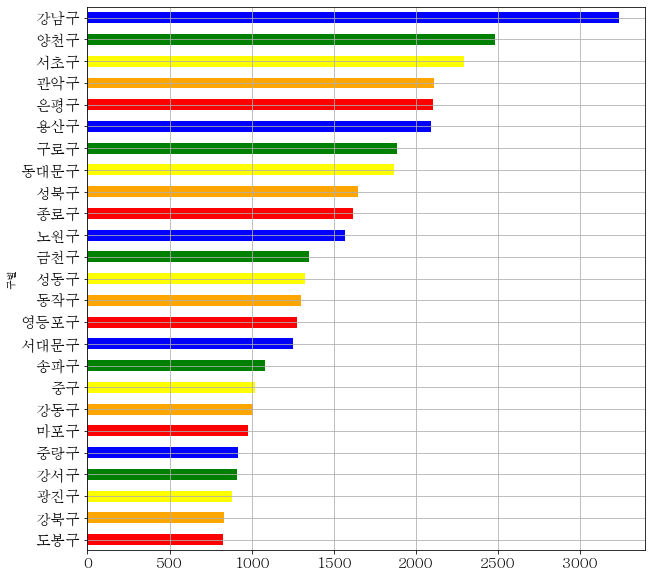

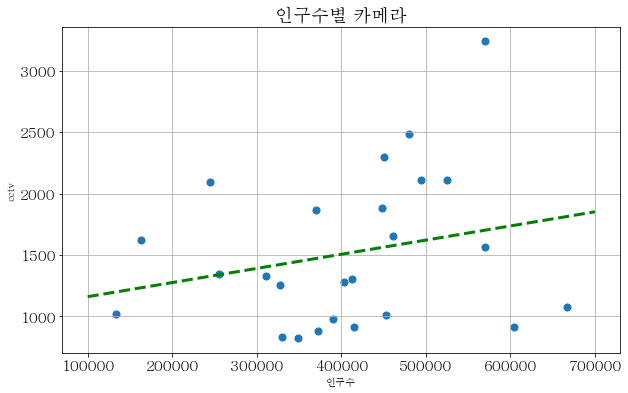

In [64]:
# 인구수와 소계 피벗 테이블 
# 상관관계 분석 y  = a x + b 
# 그래프
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Batang'
plt.rcParams['font.size'] = 15;
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.grid'] = True

#소계 그래프 표현
data_result['소계'].sort_values().plot(kind='barh', figsize=(10,10), color=['red','orange','yellow', 'green', 'blue'])
plt.show()

#cctv비율 컬럼 = 소계 / 인구수 * 100 
# 그래프
#data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] * 100
#data_result['cctv비율'].plot(kind="barh", figsize=(10,10))

import numpy as np
fp = np.polyfit(data_result['인구수'] , data_result['소계'] , 1)
fp

fp1 = np.poly1d(fp)
fx = np.linspace(100000, 700000, 100)

plt.scatter(data_result['인구수'], data_result['소계'] , s=50)
plt.plot(fx, fp1(fx) , ls='dashed' , lw=3 , color="g" )
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.title('인구수별 카메라')
plt.show();

